In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from result_saver import SaverProvider

provider = SaverProvider()

IndentationError: expected an indented block after 'if' statement on line 181 (calibration_data.py, line 183)

In [ ]:
from Scratch import load_calibration_memory

DEVICE = 'ibm_sherbrooke'
DATE = '2023-03-20'
DOUBLE_MSMT = True

all_memories = load_calibration_memory(provider, tobecalib_backend=DEVICE, other_date=DATE, double_msmt=DOUBLE_MSMT)

Found jobs for backend ibm_sherbrooke with closest execution date 2024-03-23 09:05:45.817173+00:00.


In [ ]:
from Scratch import soft_postselect_calib_data

PS_mmr = soft_postselect_calib_data(all_memories, threshold=0.5e-2)

In [ ]:
import numpy as np

for idx, data in PS_mmr.items():
    for key, value in data.items():
        if isinstance(value, np.ndarray):
            print(f'{idx} {key} {value.shape}')


0 mmr_0 (15725,)
0 mmr_1 (15702,)
0 mmr_0_scnd (15725,)
0 mmr_1_scnd (15702,)
1 mmr_0 (14788,)
1 mmr_1 (14663,)
1 mmr_0_scnd (14788,)
1 mmr_1_scnd (14663,)
2 mmr_0 (13117,)
2 mmr_1 (13306,)
2 mmr_0_scnd (13117,)
2 mmr_1_scnd (13306,)
3 mmr_0 (15610,)
3 mmr_1 (15669,)
3 mmr_0_scnd (15610,)
3 mmr_1_scnd (15669,)
4 mmr_0 (15357,)
4 mmr_1 (15338,)
4 mmr_0_scnd (15357,)
4 mmr_1_scnd (15338,)
5 mmr_0 (10155,)
5 mmr_1 (10172,)
5 mmr_0_scnd (10155,)
5 mmr_1_scnd (10172,)
6 mmr_0 (12081,)
6 mmr_1 (11992,)
6 mmr_0_scnd (12081,)
6 mmr_1_scnd (11992,)
7 mmr_0 (15435,)
7 mmr_1 (15438,)
7 mmr_0_scnd (15435,)
7 mmr_1_scnd (15438,)
8 mmr_0 (10500,)
8 mmr_1 (10465,)
8 mmr_0_scnd (10500,)
8 mmr_1_scnd (10465,)
9 mmr_0 (12861,)
9 mmr_1 (12840,)
9 mmr_0_scnd (12861,)
9 mmr_1_scnd (12840,)
10 mmr_0 (15314,)
10 mmr_1 (14990,)
10 mmr_0_scnd (15314,)
10 mmr_1_scnd (14990,)
11 mmr_0 (15427,)
11 mmr_1 (15299,)
11 mmr_0_scnd (15427,)
11 mmr_1_scnd (15299,)
12 mmr_0 (13858,)
12 mmr_1 (14155,)
12 mmr_0_scnd (13858

In [ ]:
from Scratch import filter_calib_data

fil_mmr = filter_calib_data(PS_mmr, '01')

In [ ]:
for idx, data in fil_mmr.items():
    for key, value in data.items():
        if isinstance(value, np.ndarray):
            print(f'{idx} {key} {value.shape}')

0 mmr_0 (0,)
0 mmr_0_scnd (0,)
0 mmr_1 (2,)
0 mmr_1_scnd (2,)
1 mmr_0 (61,)
1 mmr_0_scnd (61,)
1 mmr_1 (65,)
1 mmr_1_scnd (65,)
2 mmr_0 (148,)
2 mmr_0_scnd (148,)
2 mmr_1 (129,)
2 mmr_1_scnd (129,)
3 mmr_0 (11,)
3 mmr_0_scnd (11,)
3 mmr_1 (7,)
3 mmr_1_scnd (7,)
4 mmr_0 (36,)
4 mmr_0_scnd (36,)
4 mmr_1 (35,)
4 mmr_1_scnd (35,)
5 mmr_0 (372,)
5 mmr_0_scnd (372,)
5 mmr_1 (302,)
5 mmr_1_scnd (302,)
6 mmr_0 (268,)
6 mmr_0_scnd (268,)
6 mmr_1 (263,)
6 mmr_1_scnd (263,)
7 mmr_0 (27,)
7 mmr_0_scnd (27,)
7 mmr_1 (22,)
7 mmr_1_scnd (22,)
8 mmr_0 (342,)
8 mmr_0_scnd (342,)
8 mmr_1 (329,)
8 mmr_1_scnd (329,)
9 mmr_0 (166,)
9 mmr_0_scnd (166,)
9 mmr_1 (173,)
9 mmr_1_scnd (173,)
10 mmr_0 (35,)
10 mmr_0_scnd (35,)
10 mmr_1 (54,)
10 mmr_1_scnd (54,)
11 mmr_0 (26,)
11 mmr_0_scnd (26,)
11 mmr_1 (33,)
11 mmr_1_scnd (33,)
12 mmr_0 (121,)
12 mmr_0_scnd (121,)
12 mmr_1 (110,)
12 mmr_1_scnd (110,)
13 mmr_0 (311,)
13 mmr_0_scnd (311,)
13 mmr_1 (303,)
13 mmr_1_scnd (303,)
14 mmr_0 (33,)
14 mmr_0_scnd (33,)
14 

In [ ]:
from Scratch import calculate_filtered_ratios

ratios = calculate_filtered_ratios(PS_mmr)
print(ratios)

mean_ratios = {
    'ratio_0_00': 0,
    'ratio_0_01': 0,
    'ratio_0_10': 0,
    'ratio_0_11': 0,
    'ratio_1_00': 0,
    'ratio_1_01': 0,
    'ratio_1_10': 0,
    'ratio_1_11': 0,
}

for idx, data in ratios.items():
    for key, value in data.items():
        mean_ratios[key] += value
mean_ratios = {key: value/len(ratios) for key, value in mean_ratios.items()}
mean_ratios

[autoreload of Scratch.calibration.calibration_data failed: Traceback (most recent call last):
  File "/Users/mha/.local/share/virtualenvs/Soft-Info-fMUpUe5a/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/Users/mha/.local/share/virtualenvs/Soft-Info-fMUpUe5a/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/Users/mha/.pyenv/versions/3.11.4/lib/python3.11/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 621, in _exec
  File "<frozen importlib._bootstrap_external>", line 936, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1074, in get_code
  File "<frozen importlib._bootstrap_external>", line 1004, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "

{0: {'ratio_0_00': 0.9980931799402529, 'ratio_1_00': 0.007447011647890013, 'ratio_0_01': 0.0, 'ratio_1_01': 0.0001272993444083763, 'ratio_0_10': 0.0, 'ratio_1_10': 0.009420151486219846, 'ratio_0_11': 0.0019068200597470285, 'ratio_1_11': 0.9830055375214818}, 1: {'ratio_0_00': 0.9932724971691201, 'ratio_1_00': 0.02220582315845968, 'ratio_0_01': 0.00033304469459801507, 'ratio_1_01': 0.0044277472158862205, 'ratio_0_10': 0.004063145274095784, 'ratio_1_10': 0.03857507044143298, 'ratio_0_11': 0.0023313128621861054, 'ratio_1_11': 0.9347913591842211}, 2: {'ratio_0_00': 0.9791545189504374, 'ratio_1_00': 0.01800893243048552, 'ratio_0_01': 0.001239067055393586, 'ratio_1_01': 0.00972482351246218, 'ratio_0_10': 0.011151603498542275, 'ratio_1_10': 0.0172885751332661, 'ratio_0_11': 0.008454810495626823, 'ratio_1_11': 0.9549776689237862}, 3: {'ratio_0_00': 0.9822901349018605, 'ratio_1_00': 0.007269017407383792, 'ratio_0_01': 0.0037721373313726746, 'ratio_1_01': 0.0005101064847286871, 'ratio_0_10': 0.00

{'ratio_0_00': 0.9703481429538199,
 'ratio_0_01': 0.0018645285425239113,
 'ratio_0_10': 0.009181523481003661,
 'ratio_0_11': 0.01860580502265246,
 'ratio_1_00': 0.023737598232840093,
 'ratio_1_01': 0.008088689170400284,
 'ratio_1_10': 0.016400663802245266,
 'ratio_1_11': 0.9517730487945142}

In [ ]:
ratios[20]

{'ratio_0_00': 0.5477536027126307,
 'ratio_1_00': 0.43383028333215573,
 'ratio_0_01': 0.0047329754167844025,
 'ratio_1_01': 0.008478767752419982,
 'ratio_0_10': 0.01575303758123764,
 'ratio_1_10': 0.01844131986151346,
 'ratio_0_11': 0.43176038428934727,
 'ratio_1_11': 0.5392496290539108}

In [ ]:
from Scratch import postselect_exclude_double_wrong

THRESHOLD = 1e-2

PS_mmr = soft_postselect_calib_data(all_memories, threshold=THRESHOLD)
PS_d_mmr = postselect_exclude_double_wrong(PS_mmr)

In [ ]:
qubit = 71

print(all_memories[qubit]['mmr_0'].shape)
print(PS_mmr[qubit]['mmr_0'].shape)
print(PS_d_mmr[qubit]['mmr_0'].shape)

(15748,)
(15060,)
(11087,)


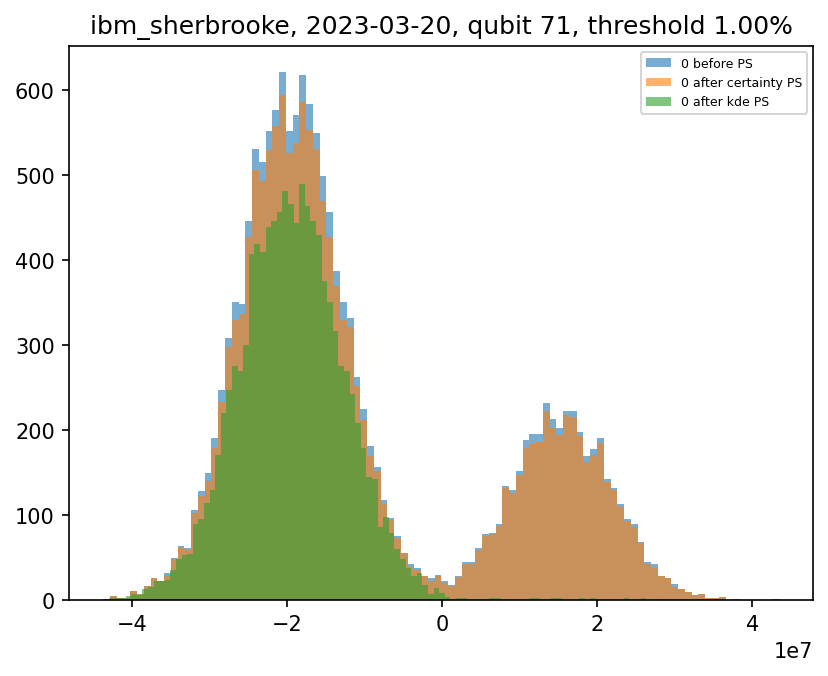

In [ ]:
import matplotlib.pyplot as plt

mmr = 'mmr_0'
mmr2 = 'mmr_1'

plt.figure(dpi=150)

plt.hist(all_memories[qubit][mmr].real.flatten(), bins=100, alpha=0.6, label='0 before PS')
plt.hist(PS_mmr[qubit][mmr].real.flatten(), bins=100, alpha=0.6, label='0 after certainty PS')
plt.hist(PS_d_mmr[qubit][mmr].real.flatten(), bins=100, alpha=0.6, label='0 after kde PS')

# plt.hist(all_memories[qubit][mmr2].real.flatten(), bins=100, alpha=0.6, label='1 before PS')
# plt.hist(PS_mmr[qubit][mmr2].real.flatten(), bins=100, alpha=0.6, label='1 after certainty PS')
# plt.hist(PS_d_mmr[qubit][mmr2].real.flatten(), bins=100, alpha=0.6, label='1 after kde PS')


plt.title(f"{DEVICE}, {DATE}, qubit {qubit}, threshold {THRESHOLD*100:.2f}%")
plt.legend(fontsize=6)
plt.show()

In [ ]:
from Scratch import get_msmt_err_probs

err_probs = get_msmt_err_probs(ratios)
print(err_probs)

# print the max error probability 
sorted_soft = sorted(err_probs.items(), key=lambda x: x[1]['p_soft'], reverse=True)
sorted_hard = sorted(err_probs.items(), key=lambda x: x[1]['p_hard'], reverse=True)
    
max_p_soft = sorted_soft[0]
max_p_hard = sorted_hard[0]

print()
print("sorted soft:", sorted_soft)
print("sorted hard:", sorted_hard)

{0: {'p_hard': 0.004679535117396162, 'p_soft': 6.368615462998345e-05}, 1: {'p_hard': 0.012266284444325235, 'p_soft': 0.004278946301111634}, 2: {'p_hard': 0.012682192746865465, 'p_soft': 0.010488971133676825}, 3: {'p_hard': 0.010139998231348236, 'p_soft': 0.0005757092320146902}, 4: {'p_hard': 0.006940312372378781, 'p_soft': 0.0023130610265611933}, 5: {'p_hard': 0.0089541084871476, 'p_soft': 0.033160772090791706}, 6: {'p_hard': 0.020140724144711655, 'p_soft': 0.022057440799177486}, 7: {'p_hard': 0.006153892349233291, 'p_soft': 0.0015871630979858492}, 8: {'p_hard': 0.004153686892817327, 'p_soft': 0.03200477783086479}, 9: {'p_hard': 0.030965219779860435, 'p_soft': 0.013190379594325233}, 10: {'p_hard': 0.005129182373377995, 'p_soft': 0.0029439460010038474}, 11: {'p_hard': 0.009067664182927522, 'p_soft': 0.001921180283817136}, 12: {'p_hard': 0.012778446817824574, 'p_soft': 0.008251262145761733}, 13: {'p_hard': 0.00995712376997867, 'p_soft': 0.028081536206353896}, 14: {'p_hard': 0.02491547529

In [ ]:
# print the mean error probability
mean_p_soft = sum([x[1]['p_soft'] for x in err_probs.items()])/len(err_probs)
mean_p_hard = sum([x[1]['p_hard'] for x in err_probs.items()])/len(err_probs)

print(f"mean p_soft: {mean_p_soft}")
print(f"mean p_hard: {mean_p_hard}")

mean p_soft: 0.008758481205035865
mean p_hard: 0.021118219958925266


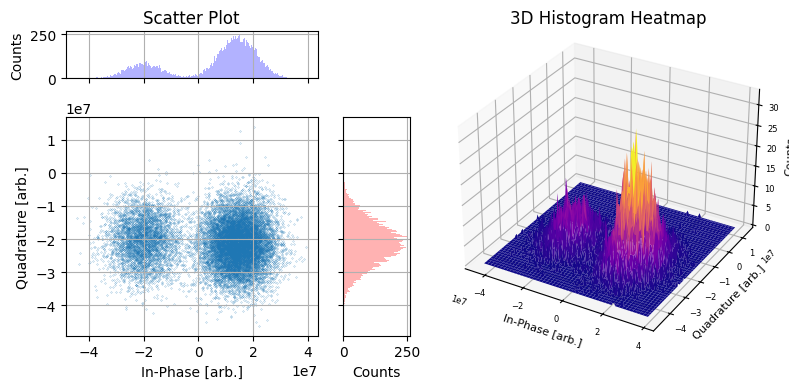

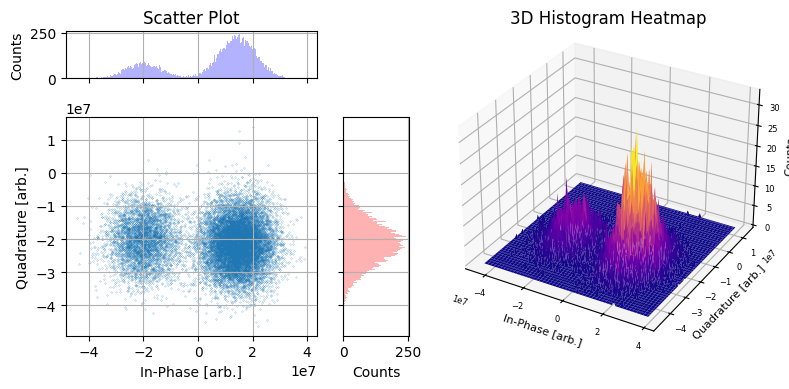

In [ ]:
from soft_info import plot_IQ_data


plot_IQ_data(all_memories[qubit]['mmr_1'])
plot_IQ_data(PS_mmr[qubit]['mmr_1'])